<a href="https://colab.research.google.com/github/aseddin/F23_ECE4715/blob/main/3_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

A simple model that generates predictions by computing a weighted sum of input features along with a bias term, sometimes referred to as an intercept.

$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n$$

* $\hat{y}$: is the predicted value
* $x_i$: is the $i^{th}$ feature value (There are $n$ features)
* $\theta_0$: is the bias term
* $\theta_i$: are the the model parameters (i.e. model weights)

We can express the linear regression equation in a vectorized form as follows:

$$\hat{y} = h_\theta(\bf{x}) = \theta_0 + \bf{\Theta}^T x$$

or if you augment $\bf{x}$ by 1:

$$\hat{y} = h_\theta(\bf{x}) = \bf{\Theta}^T \bf{x}$$

$\bf{\Theta}$ are the model parameters including the bias and $x_0$ is always 1. $h_{\theta}$ is the hypothesis function and it utilizes the model parameters $\bf{\Theta}$.

The training algorithm finds $\bf{\Theta}$ that minimizes a cost/loss function using the $m$ instances in the training set. For linear regression an appropriate loss function is the _root mean squared errors_:

$$\text{RMSE}(\bf{\Theta}) = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})^2}$$

$$\text{RMSE}(\bf{\Theta}) = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(\bf{\Theta}^T \bf{x}^{(i)} - y^{(i)})^2}$$

Since the MSE is a positive function then minimizing it (or its root) should yeild similar results.

$$\text{MSE}(\bf{\Theta}) = \frac{1}{m}\sum_{i=1}^{m}(\bf{\Theta}^T \bf{x}^{(i)} - y^{(i)})^2$$

In [1]:
# code to set things up

# importing common libraries
import numpy as np
import pandas as pd

# Things related to figures and plots
# make figures look nicer
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
# Generate some linear looking data

m = 100 # number of instances
np.random.seed(42)
X = 2 * np.random.rand(m, 1) # column vector

theta0 = 4
theta1 = 3

y = theta0 + theta1 * X + np.random.randn(m, 1) # column vector

In [3]:
X.shape

(100, 1)

In [4]:
y.shape

(100, 1)

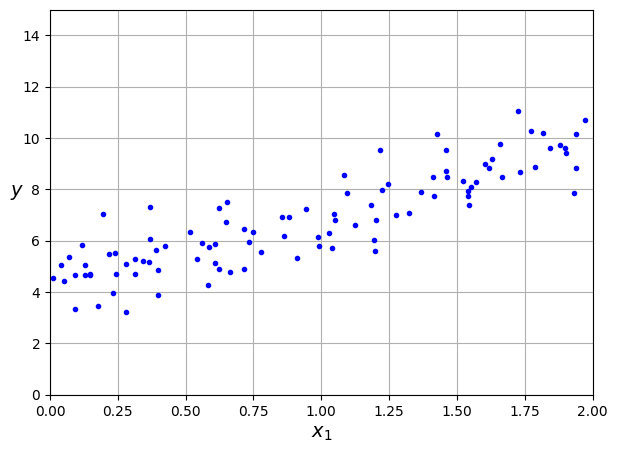

In [5]:
# plot the generated data

plt.figure(figsize=(7, 5))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [6]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add x0 = 1 to each instance (for the bias)
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [7]:
X_b.shape

(100, 2)

## The Normal Equation

The normal equation provides a closed-form solution for finding $\bf{\Theta}$  that minimizes the cost function:

$$
\text{MSE}(\bf{\Theta}) = \frac{1}{m} \sum_{i=1}^{m}(\bf{\Theta}^T \bf{x}^{(i)} - y^{(i)})^2
$$

The solution is closed-form, which means it is derived from a mathematical expression that directly yields the solution without requiring iterative approximations.

$$
\hat{\bf{\Theta}}=(\bf{X}^T\bf{X})^{-1}\bf{X}^T\bf{Y}
$$

$\hat{\bf{\Theta}}$ is the estimated value that minimizes the $\text{MSE}(\bf{\Theta})$

$X^{\dagger} = (\bf{X}^T\bf{X})^{-1}\bf{X}^T$ is the left pseudo inverse of the (non-square) matrix $\bf{X}$. Specifically it is the Moore-Penrose inverse.




In [8]:
# The normal equation solution

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print("Best parameters=\n", theta_best)
print()
print("theta0=", theta0)
print("theta1=", theta1)

Best parameters=
 [[4.21509616]
 [2.77011339]]

theta0= 4
theta1= 3


It is easy to make predictions on a new input instance using `theta_best`

In [9]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

Let's plot the model's predictions

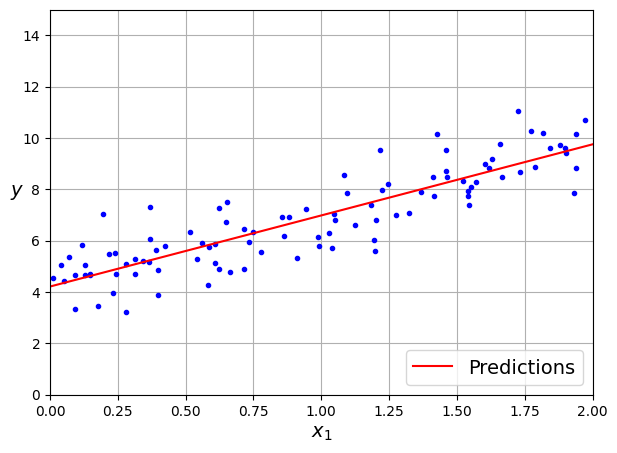

In [10]:
plt.figure(figsize=(7, 5))
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="lower right")
plt.show()

If `np.linalg.inv` didn't work because $(\bf{X}^T\bf{X})^{-1}$ is not invertable. You can compute the pseudoinverse $X^{\dagger} = (\bf{X}^T\bf{X})^{-1}\bf{X}^T$ using `np.linalg.pinv()` which utilizes SVD

$$
\hat{\bf{\Theta}}=X^{\dagger}\bf{Y}
$$

In [11]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

`sklearn`'s `LinearRegression` generates the same result

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("bias=", lin_reg.intercept_)
print("parameters=", lin_reg.coef_)

bias= [4.21509616]
parameters= [[2.77011339]]


In [13]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## Gradient Descent

Gradient descent is a versatile optimization technique employed to iteratively change a model's parameters for minimizing a cost or loss function. For optimal results, it's advisable to use features of the same scale before applying gradient descent, for instance, by utilizing the `StandardScaler`.

In the upcoming sections, we will delve into three variations of Gradient Descent techniques:
- Batch Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent

### Batch Gradient Descent

1. Pick a cost/loss function:

  For linear regression:

$$
\text{MSE}(\bf{\Theta}) = \frac{1}{m}\sum_{i=1}^{m} (\bf{\Theta}^{T}X^{(i)}-y^{(i)})^2
$$

2. Compute the gradient of the cost function with regard to each model parameter $\theta_j$

  $$
  \frac{\partial}{\partial \theta_j}\text{MSE}(\bf{\Theta}) = \frac{2}{m}
  \sum_{i=1}^{m} (\bf{\Theta}^T X^{(i)} - y^{(i)})x_j^{(i)}
  $$

  Partial derivatives can be computed all together with the following gradient vector:

$$
\nabla_\Theta \text{MSE}(\bf{\Theta}) =
\begin{bmatrix}
\frac{\partial}{\partial \theta_0}\text{MSE}(\bf{\Theta}) \\
\frac{\partial}{\partial \theta_1}\text{MSE}(\bf{\Theta}) \\
\vdots\\
\frac{\partial}{\partial \theta_n}\text{MSE}(\bf{\Theta}) \\
\end{bmatrix}
= \frac{2}{m}X^T(X\Theta-y)
$$

3. Take a gradient step
$$
\bf{\Theta}^{\text{(next step)}} = \bf{\Theta}^{\text{(current step)}} - \eta \nabla_{\Theta} \text{MSE}(\bf{\Theta})
$$

  The gradient points uphill, to go downhill subtract $\nabla_{\Theta}\text{MSE}(\bf{\Theta})$ from $\bf{\Theta}$.
  
  $\eta$ is the learning rate and it controls the step size

4. Repeat (step 2 through 4) untill a certain condition is met (i.e. number of maximum epochs is reached, the norm of $\nabla_\Theta \text{MSE}(\bf{\Theta})$ is below a threshold $\epsilon$...etc)

At each gradient descent step, the full training set $\bf{X}$ is used; hence, it is called _**Batch**_ Gradient Descent. It is usally slow if the training set is very large; however, it scales well with the number of features and will perform much faster than the Normal Equation.

In [14]:
# Batch Gradient Descent

# Learning rate
eta = 0.1

# Number of epochs (i.e. steps)
n_epochs = 1000

m = len(X_b) # number of training instances

theta = np.random.randn(2, 1) # random initialization

theta_path_bgd = [] # will be used to compare with stochastic GD and mini-batch GD

for epoch in range(n_epochs):
  gradients = 2 / m * X_b.T @ (X_b @ theta - y)
  theta = theta - eta * gradients
  theta_path_bgd.append(theta)


The learned model parameters:

In [15]:
theta

array([[4.21509616],
       [2.77011339]])

The results are identical to the Linear Regression outcomes.

In [16]:
print("bias=", lin_reg.intercept_)
print("parameters=", lin_reg.coef_)

bias= [4.21509616]
parameters= [[2.77011339]]


#### Showing the effect of the learing rate $\eta$

In [17]:
# Learning rate
eta = 0.1 # converges
#eta = 0.02 # converges slowly
#eta = 0.5 # diverges

epoch = 0

m = len(X_b) # number of training instances
X_new = np.array([[0], [2]]) # to plot the regressor

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

from sklearn.metrics import mean_squared_error

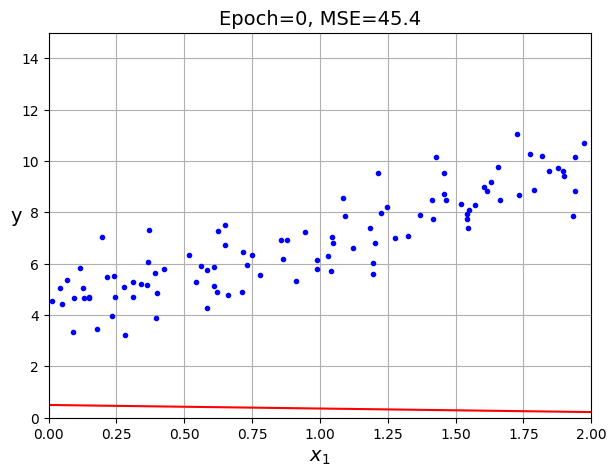

In [18]:
# run this cell several times to see how Gradient Descent progresses with each epoch

# plot the raw data points
plt.figure(figsize=(7, 5))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("y", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

# compute the performance measure (MSE)
mse = mean_squared_error(y, X_b @ theta)
plt.title(f"Epoch={epoch}, MSE={mse:.3}")

y_new_predict = X_new_b @ theta
plt.plot(X_new, y_new_predict, 'r-')

epoch = epoch + 1
gradients = 2 / m * X_b.T @ (X_b @ theta - y)
theta = theta - eta * gradients

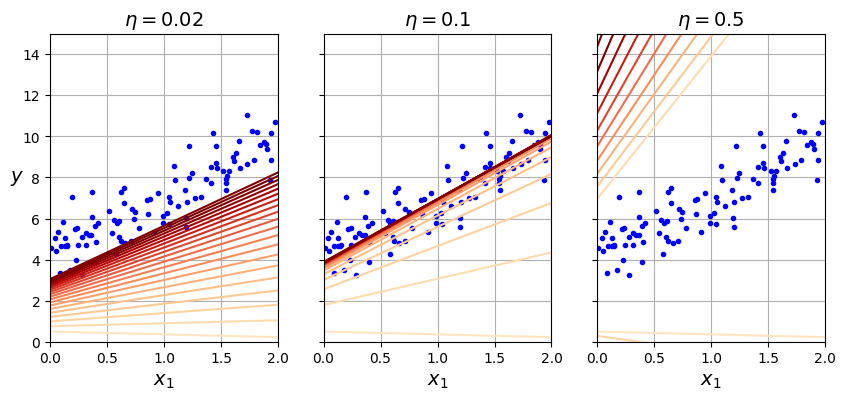

In [19]:
# Plot the first n_shown steps of gradient descent
# the color of the regressor gets darker and darker

import matplotlib as mpl

def plot_gradient_descent(theta, eta, n_shown=20):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(f"$\eta = {eta}$")

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

A grid search can be used to determine an appropriate learning rate $\eta$. To expedite the process, it's recommended to restrict the number of epochs in the grid search to exclude models that exhibit excessively slow convergence.

### Stochastic Gradient Descent (SGD)

Batch Gradient Descent utilizes the entire training dataset to compute gradients in each step, which can make it slower when dealing with large training sets. In contrast, Stochastic Gradient Descent (SGD) randomly selects a single instance from the training set to calculate the gradient at each training step. Stochastic Gradient Descent is notably faster as it deals with one instance at a time, but it also introduces more randomness compared to Batch Gradient Descent. The cost function exhibits fluctuations due to the random selection of instances; nevertheless, it tends to decrease on average over time.

The gradient vector for stochastic gradient descent is:

$$
\nabla_{\Theta} \text{MSE}(\bf{\Theta}) =
\begin{bmatrix}
\frac{\partial}{\partial \theta_0}\text{MSE}(\bf{\Theta}) \\
\frac{\partial}{\partial \theta_1}\text{MSE}(\bf{\Theta}) \\
\vdots\\
\frac{\partial}{\partial \theta_n}\text{MSE}(\bf{\Theta}) \\
\end{bmatrix}
= 2{x^{(i)}}^T(x^{(i)}\Theta-y^{(i)})
$$

SGD doesn't converge to the optimal solution as it continuously fluctuates around it. One approach to address this issue is to adapt the learning rate dynamically using a learning schedule as the training progresses.

In [20]:
# Stochastic Gradient Descent

# Learning rate schedule
# learning schedule hyperparameters
t0, t1 = 5, 50
def learning_schedule(t):
  return t0 / (t + t1)

# Number of epochs
n_epochs = 50

m = len(X_b) # number of training instances

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

theta_path_sgd = [] # will be used to compare with batch GD and mini-batch GD

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index: random_index + 1]
    yi = y[random_index:random_index + 1]
    gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD, do not divide by m
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients
    theta_path_sgd.append(theta)

In [21]:
theta

array([[4.21076011],
       [2.74856079]])

It's important to note that SGD completed only 50 passes through the training set (in contrast to the 1000 passes in batch GD) and achieved comparable results faster.

#### Showing the progress of SGD

In [22]:
n_epochs = 50

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

epoch = 0
iteration = 0

m = len(X_b) # number of training instances
X_new = np.array([[0], [2]]) # to plot the regressor

from sklearn.metrics import mean_squared_error

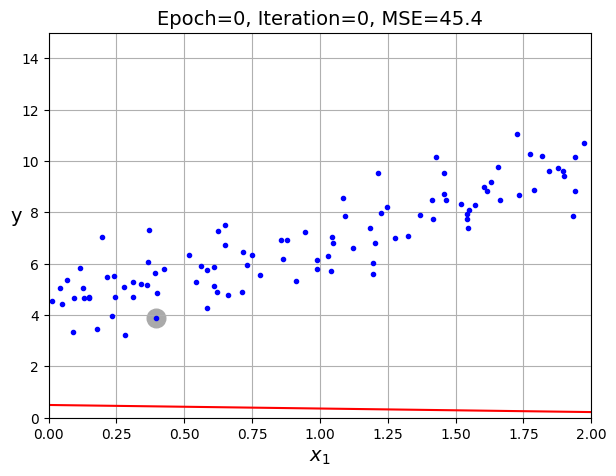

In [23]:
# run this cell several times to see how Stochastic Gradient Descent progresses with each step (not epoch)

# plot the raw data points
plt.figure(figsize=(7, 5))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("y", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

# compute the performance measure (MSE)
mse = mean_squared_error(y, X_b @ theta)
plt.title(f"Epoch={epoch}, Iteration={iteration}, MSE={mse:.3}")

y_new_predict = X_new_b @ theta
plt.plot(X_new, y_new_predict, 'r-')

random_index = np.random.randint(m)
xi = X_b[random_index: random_index + 1]
yi = y[random_index: random_index + 1]
plt.scatter(xi[0][1], yi, s=180, zorder=-1, facecolors='#AAA')
gradients = 2 * xi.T @ (xi @ theta - yi)
eta = learning_schedule(epoch * m + iteration)
theta = theta - eta * gradients

iteration = iteration + 1
if iteration == m:
  epoch = epoch + 1
  iteration = 0


The  code above does not ensure that each instance will be utilized exactly once in every epoch. Put differently, some instances may be used multiple times while others may not be used at all within each epoch.

#### Using `SGDRegressor`

`sklearn` offers the `SGDRegressor` class for performing stohastic gradient descent regression.

In [24]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(
    max_iter=1000, penalty=None, eta0=0.01,
    tol=1e-5, n_iter_no_change=100, random_state=42
)

# fit X not X_b as SGDRegressor will add the dummy feature automatically
# use y.ravel not y because fit() expects 1D targets of the shape (100, ) as opposed of (100, 1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [25]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

### Mini-Batch Gradient Descent

Batch Gradient Descent utilizes the entire training set in each iteration, while Stochastic Gradient Descent selects a single random instance from the training set at every training step. Mini-Batch Gradient Descent falls in between these two approaches by using small random sets of instances, referred to as mini-batches, during each training step.

Mini-Batch Gradient Descent provides some performance improvements due to optimized hardware matrix operations. Moreover, it exhibits smoother parameter space traversal compared to Stochastic Gradient Descent, resulting in less erratic behavior.

The gradient vector for mini-batch gradient descent is:

$$
\nabla_\Theta \text{MSE}(\bf{\Theta}) =
\begin{bmatrix}
\frac{\partial}{\partial \theta_0}\text{MSE}(\bf{\Theta}) \\
\frac{\partial}{\partial \theta_1}\text{MSE}(\bf{\Theta}) \\
\vdots\\
\frac{\partial}{\partial \theta_n}\text{MSE}(\bf{\Theta}) \\
\end{bmatrix}
= \frac{2}{\text{batch size}}{x^{(batch)}}^T(x^{(batch)}\Theta-y^{(batch)})
$$

In [26]:
# Mini-Batch Gradient Descent

from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

# Learning rate schedule
# learning schedule hyperparameters
t0, t1 = 200, 1000
def learning_schedule(t):
  return t0 / (t + t1)

theta_path_mgd = []

for epoch in range(n_epochs):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for iteration in range(n_batches_per_epoch):
    idx = iteration * minibatch_size
    xi = X_b_shuffled[idx:idx + minibatch_size]
    yi = y_shuffled[idx:idx + minibatch_size]
    gradients = 2/minibatch_size * xi.T @ (xi @ theta - yi)
    eta = learning_schedule(iteration)
    theta = theta - eta * gradients
    theta_path_mgd.append(theta)

In [27]:
theta

array([[4.2857119],
       [2.8119161]])

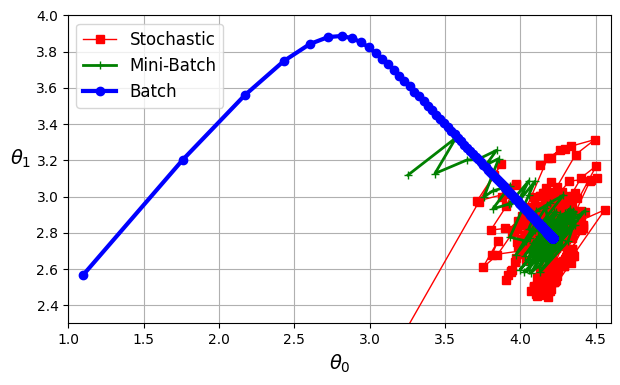

In [28]:
# Plot the parameter path taken using Batch GD, Stochastic GD, Mini-Batch GD

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-Batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")


plt.legend(loc="upper left", fontsize=12)
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$    ", rotation=0)
plt.axis([1, 4.6, 2.3, 4])

plt.grid()
plt.show()

## Polynomial Regression

When dealing with nonlinear data, a simple linear model (i.e. straight line) may not adequately capture its complexity. However, it is still possible to leverage a linear model by adding powers of each feature as new features, then train a linear model on this expanded feature set. This approach is known as _Polynomial Regression_.

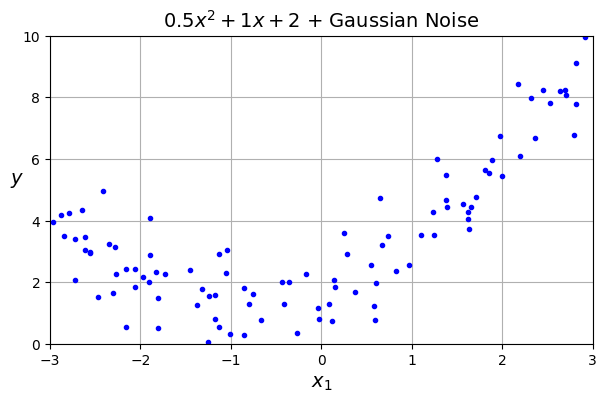

In [29]:
# Generate some nonlinear looking data

m = 100 # number of instances
np.random.seed(42)
X = 6 * np.random.rand(m, 1) - 3 # random numbers between -3 and 3

theta0 = 2    # bias
theta1 = 1    # X
theta2 = 0.5  # X**2

# Simple quadratic equation
y = theta0 + theta1 * X + theta2 * X**2 + np.random.randn(m , 1)

plt.figure(figsize=(7, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.title(f"${theta2} x^2 + {theta1} x + {theta0}$ + Gaussian Noise")
plt.grid()
plt.show()

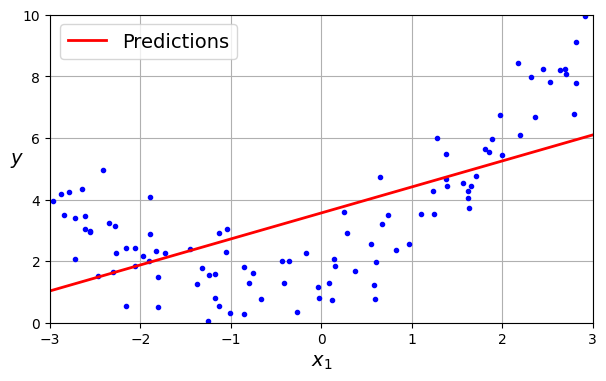

In [30]:
# Applying a linear model to nonlinear data
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

X_new = [[-3], [3]]
y_new = lin_reg.predict(X_new)

plt.figure(figsize=(7, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.legend(loc="upper left")
plt.grid()
plt.show()

Evidently, a line cannot fit the quadratic data properly so we should add polynomial features

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [32]:
X[0:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [33]:
# contains the original x and its square
X_poly[0:5]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281],
       [ 0.59195091,  0.35040587],
       [-2.06388816,  4.25963433]])

We only have 1 feature, so `PolynomialFeatures` with `degree=2` generated one new feature. If we have more features, then we would have gotten the `degree` of each feature and an interaction term between all combinations of features up to `degree`

In [34]:
# fit a linear model to the new polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(f"bias: {lin_reg.intercept_}")
print(f"parameters: {lin_reg.coef_}")

bias: [1.78134581]
parameters: [[0.93366893 0.56456263]]


In [35]:
# The true parameters
print(f"bias theta0: {theta0}")
print(f"parameters theta1 & theta2: {theta1}, {theta2}")

bias theta0: 2
parameters theta1 & theta2: 1, 0.5


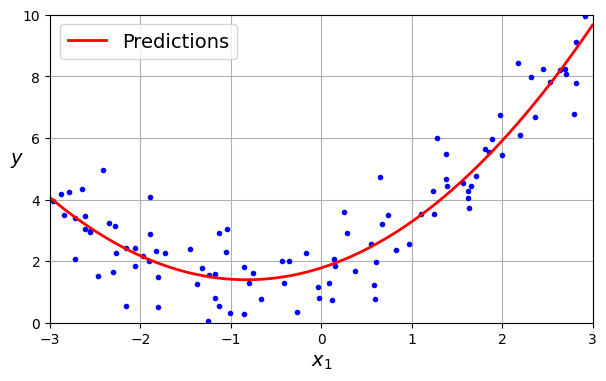

In [36]:
# plot the polynomial regressor

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(7, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.legend(loc="upper left")
plt.show()

What if we fit higher degree polynomial to the data

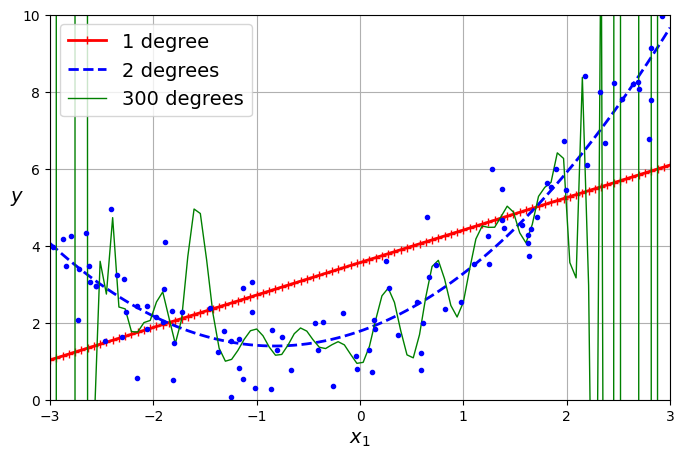

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

plt.figure(figsize=(8, 5))

train_rmse_by_degree = {}
valid_rmse_by_degree = {}

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    # StandardScaler is necessary to make all features of the same scale
    # this is especially important for higher degree polynomials
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    train_rmse_by_degree[degree] = mean_squared_error(y, polynomial_regression.predict(X), squared=False)
    valid_rmse_by_degree[degree] = -np.mean(cross_val_score(polynomial_regression, X, y, scoring='neg_root_mean_squared_error', cv=5))
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Clearly the 300 degrees polynomial fits the training data better than the lower degree polynomials. However, this is not always a good thing. The model is clearly _**overfitting**_ the training data and will not generalize well.

The model that seem to generalize best is the quadratic model and this is reasonable because the data was generated using a quadratic equation. However, generally you will not know what function generated the data, so how should you decide how complex a model should be? Whether it is overfitting or underfitting the data?

## Learning Curves